# Домашнее задание №2

Тема "Доверительные интервалы"

Общие положения:
- Макс кол-во баллов за ДЗ - 25 баллов
- Качество оформления и кода играет роль

Список заданий:
1.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm, t

plt.style.use("ggplot")
%matplotlib inline

In [2]:
# Задаем стандартное нормальное распределение
norm_distr = norm(loc=0, scale=1)

# Рассчитываем квантиль по заданному уровню значимости
alpha = 0.05
z = norm_distr.ppf(1 - alpha / 2)
print(round(z, 2))

1.96


## Задание 1  
Компания утверждает, что длина шнурков в партии обуви имеет среднее значение 120 см, и стандартное отклонение в партии точно известно и составляет 5 см. Из выборки 25 шнурков было получено среднее значение длины 122 см. Найдите 99%-ый доверительный интервал для среднего значения длины шнурков (1 балл)

In [3]:
# Исходные данные
sample_size = 25
sample_mean = 122
sigma = 5
alpha = 0.01

# Расчет доверительного интервала
z_score = norm.ppf(1 - alpha / 2)
std_error = sigma / np.sqrt(sample_size)
margin_of_error = z_score * std_error

lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print(
    f"99% доверительный интервал: [{lower_bound:.2f}, {upper_bound:.2f}], ширина {upper_bound - lower_bound:.2f}"
)

99% доверительный интервал: [119.42, 124.58], ширина 5.15


## Задание 2
Компания исследует среднее время выполнения заказа курьерской службой. Было случайным образом выбрано 10 заказов, для которых среднее время доставки составило 45 минут, а выборочная дисперсия — 9 минут. Постройте 95%-ый доверительный интервал для среднего времени доставки заказа (1 балл)

In [4]:
# Исходные данные
n = 10
mean_time = 45
variance = 9
alpha = 0.05

# Расчет доверительного интервала
t_score = t.ppf(1 - alpha / 2, df=(n - 1))
margin_of_error = t_score * np.sqrt(variance / n)

lower_bound = mean_time - margin_of_error
upper_bound = mean_time + margin_of_error

print(
    f"95%-ый доверительный интервал: [{lower_bound:.2f}, {upper_bound:.2f}], ширина {upper_bound - lower_bound:.2f}"
)

95%-ый доверительный интервал: [42.85, 47.15], ширина 4.29


## Задание 3
Интернет-магазин хочет определить долю пользователей, которые возвращаются для повторной покупки в течение месяца после первой покупки. Для этого он проанализировал выборку из 800 клиентов, и оказалось, что 240 из них сделали повторную покупку в течение месяца. Необходимо определить 95% доверительный интервал для истинной доли клиентов, которые возвращаются для повторной покупки в течение этого времени (1 балл)


In [5]:
# Исходные данные
n = 800
k = 240
alpha = 0.05

# Вычисление доверительного интервала
z_score = norm.ppf(1 - alpha / 2)
p = k / n
margin_of_error = z_score * np.sqrt(p * (1 - p) / n)

lower_bound = p - margin_of_error
upper_bound = p + margin_of_error

print(
    f"95%-ый доверительный интервал: [{lower_bound:.2f}, {upper_bound:.2f}], ширина {upper_bound - lower_bound:.2f}"
)

95%-ый доверительный интервал: [0.27, 0.33], ширина 0.06


## Задание 4
Два студента Тимофей и Пётр решают задачи из учебника по статистике, каждый со своей усердностью λ (количество решенных задач в день).
Тимофей считает себя более усердным студентом. Необходимо построить доверительный для разности λ1 - λ2 и проверить, правда ли это.
Студенты решают задачи независимо друг от друга (1 балл)

In [6]:
# Данные
a = [7, 5, 2, 8, 4, 9, 2, 6, 6, 7]  # Тимофей
b = [3, 3, 3, 9, 9, 2, 2, 2, 2, 9]  # Пётр

In [7]:
# Преобразование данных
a = np.array(a)
b = np.array(b)

# Вычисление средних значений и стандартных отклонений
mean_a = np.mean(a)
std_a = np.std(a, ddof=1)
mean_b = np.mean(b)
std_b = np.std(b, ddof=1)

print("Среднее значение для Тимофея:", mean_a)
print("Стандартное отклонение для Тимофея:", round(std_a, 2))
print("Среднее значение для Петра:", mean_b)
print("Стандартное отклонение для Петра:", round(std_b, 2))

Среднее значение для Тимофея: 5.6
Стандартное отклонение для Тимофея: 2.37
Среднее значение для Петра: 4.4
Стандартное отклонение для Петра: 3.2


In [8]:
alpha = 0.05
z_alpha = norm.ppf(1 - alpha / 2)

diff = np.mean(a) - np.mean(b)
diff_se = np.sqrt(np.mean(a) / len(a) + np.mean(b) / len(b))

left = diff - z_alpha * diff_se
right = diff + z_alpha * diff_se

print(
    f"95%-ый доверительный интервал: [{left:.2f}, {right:.2f}], ширина {right - left:.2f}"
)

95%-ый доверительный интервал: [-0.76, 3.16], ширина 3.92


In [9]:
# Проверка, правда ли Тимофей более усердный студент
if mean_a > mean_b:
    print("Тимофей действительно более усердный студент")
else:
    print("Петр более усердный студент")

Тимофей действительно более усердный студент


## Задания 5-8 (5 баллов всего)

In [10]:
!curl -O https://raw.githubusercontent.com/practical-jupyter/sample-data/refs/heads/master/anime/anime.csv >> anime.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  778k  100  778k    0     0  1693k      0 --:--:-- --:--:-- --:--:-- 1693k


Описание датафрейма:
- `anime_id` - ID
- `name` - название
- `genre` - жанр (строка с пречисление через запятую)
- `type` - формат
- `episodes` - кол-во эпизодов
- `rating` - средний рейтинг
- `members` - кол-во смотрящих

In [11]:
df_anime = pd.read_csv("anime.csv")
df_anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10486 entries, 0 to 10485
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  10486 non-null  int64  
 1   name      10486 non-null  object 
 2   genre     10424 non-null  object 
 3   type      10463 non-null  object 
 4   episodes  10486 non-null  object 
 5   rating    10275 non-null  float64
 6   members   10486 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 573.6+ KB


In [12]:
df_anime.isna().sum()

anime_id      0
name          0
genre        62
type         23
episodes      0
rating      211
members       0
dtype: int64

In [13]:
# Замена пустых значений количества эпизодов и перевод столбца в int
df_anime["episodes"] = df_anime["episodes"].replace("Unknown", "1").astype(np.int64)

In [14]:
df_anime.dtypes

anime_id      int64
name         object
genre        object
type         object
episodes      int64
rating      float64
members       int64
dtype: object

In [15]:
df_anime.describe()

,anime_id,episodes,rating,members
count,10486.000000,10486.000000,10275.000000,1.048600e+04
mean,14697.595461,13.451459,6.493899,1.847893e+04
std,11594.539648,49.878724,1.066551,5.655936e+04
min,1.000000,1.000000,1.670000,5.000000e+00
25%,3615.750000,1.000000,5.870000,1.730000e+02
50%,11065.000000,1.000000,6.600000,1.197500e+03
75%,26018.500000,13.000000,7.250000,9.741750e+03
max,34527.000000,1818.000000,10.000000,1.013917e+06


In [16]:
df_anime.describe(include=object)

,name,genre,type
count,10486,10424,10463
unique,10484,2776,6
top,Shi Wan Ge Leng Xiaohua,Comedy,TV
freq,2,523,3542


In [17]:
# Копирование исходного датасета (что бы иметь возможность обратиться к исходнику)
df_genre_str = df_anime.copy()

# Разделение жанров
df_genre_str["genre"] = df_genre_str["genre"].str.split(",")
df_genre_str = df_genre_str.explode("genre")
df_genre_str["genre"] = df_genre_str["genre"].str.strip()

df_genre_str.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,Drama,Movie,1,9.37,200630
0,32281,Kimi no Na wa.,Romance,Movie,1,9.37,200630
0,32281,Kimi no Na wa.,School,Movie,1,9.37,200630
0,32281,Kimi no Na wa.,Supernatural,Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,Action,TV,64,9.26,793665


## 5. Постройте доверительный интервал для среднего рейтинга по всем аниме (1 балл)

In [18]:
data = df_anime["rating"]

# Вычисление среднего значения и стандартного отклонения
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)
n = len(data)
alpha = 0.05

# Вычисление доверительного интервала
z_score = norm.ppf(1 - alpha / 2)
margin_of_error = z_score * sample_std / np.sqrt(n)

lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print(
    f"95%-ый доверительный интервал: [{lower_bound:.2f}, {upper_bound:.2f}], ширина {upper_bound - lower_bound:.2f}"
)

95%-ый доверительный интервал: [6.47, 6.51], ширина 0.04


## 6. Постройте доверительные интервалы для средних рейтингов по жанрам  (1 балл)

In [19]:
genres = df_genre_str["genre"].unique()[:-1]

intervals = {}

In [20]:
for gen in genres:
    data_gen = df_genre_str[df_genre_str["genre"] == gen]

    data = data_gen["rating"]

    # Вычисление среднего значения и стандартного отклонения
    sample_mean = np.mean(data)
    sample_std = np.std(data, ddof=1)
    n = len(data)
    alpha = 0.05

    # Вычисление доверительного интервала
    z_score = norm.ppf(1 - alpha / 2)
    margin_of_error = z_score * sample_std / np.sqrt(n)

    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error

    intervals[gen] = [round(float(lower_bound), 2), round(float(upper_bound), 2)]

In [21]:
for key, value in intervals.items():
    print(
        f"95%-ый доверительный интервал жанра {key}: {value}, ширина {value[1] - value[0]:.2f}"
    )

95%-ый доверительный интервал жанра Drama: [6.95, 7.03], ширина 0.08
95%-ый доверительный интервал жанра Romance: [7.02, 7.11], ширина 0.09
95%-ый доверительный интервал жанра School: [6.96, 7.07], ширина 0.11
95%-ый доверительный интервал жанра Supernatural: [6.98, 7.1], ширина 0.12
95%-ый доверительный интервал жанра Action: [6.77, 6.84], ширина 0.07
95%-ый доверительный интервал жанра Adventure: [6.71, 6.78], ширина 0.07
95%-ый доверительный интервал жанра Fantasy: [6.64, 6.71], ширина 0.07
95%-ый доверительный интервал жанра Magic: [6.76, 6.88], ширина 0.12
95%-ый доверительный интервал жанра Military: [6.93, 7.11], ширина 0.18
95%-ый доверительный интервал жанра Shounen: [7.02, 7.1], ширина 0.08
95%-ый доверительный интервал жанра Comedy: [6.59, 6.65], ширина 0.06
95%-ый доверительный интервал жанра Historical: [6.69, 6.83], ширина 0.14
95%-ый доверительный интервал жанра Parody: [6.44, 6.67], ширина 0.23
95%-ый доверительный интервал жанра Samurai: [6.66, 7.03], ширина 0.37
95%-ы

## 7. Постройте доверительные интервалы среднего рейтинга по типам аниме (1 балл)

In [22]:
types = df_anime["type"].unique()[:-1]

intervals = {}

In [23]:
for typ in types:
    data_typ = df_anime[df_anime["type"] == typ]

    data = data_typ["rating"]

    # Вычисление среднего значения и стандартного отклонения
    sample_mean = np.mean(data)
    sample_std = np.std(data, ddof=1)
    n = len(data)
    alpha = 0.05

    # Вычисление доверительного интервала
    z_score = norm.ppf(1 - alpha / 2)
    margin_of_error = z_score * sample_std / np.sqrt(n)

    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error

    intervals[typ] = [round(float(lower_bound), 2), round(float(upper_bound), 2)]

In [24]:
for key, value in intervals.items():
    print(
        f"95%-ый доверительный интервал типа {key}: {value}, ширина {value[1] - value[0]:.2f}"
    )

95%-ый доверительный интервал типа Movie: [6.26, 6.36], ширина 0.10
95%-ый доверительный интервал типа TV: [6.87, 6.93], ширина 0.06
95%-ый доверительный интервал типа OVA: [6.43, 6.52], ширина 0.09
95%-ый доверительный интервал типа Special: [6.48, 6.57], ширина 0.09
95%-ый доверительный интервал типа Music: [5.5, 5.67], ширина 0.17
95%-ый доверительный интервал типа ONA: [5.55, 5.72], ширина 0.17


## 8. По доверительным интервалам для episodes, rating и members оцените количество аномалий (2 балла)

In [25]:
data_episodes = df_anime["episodes"]
data_rating = df_anime["rating"]
data_members = df_anime["members"]

In [26]:
def conf_interval(df, alpha=0.05):
    # Вычисление среднего значения и стандартного отклонения
    sample_mean = np.mean(df)
    sample_std = np.std(df, ddof=1)
    n = len(df)

    # Вычисление доверительного интервала
    z_score = norm.ppf(1 - alpha / 2)
    margin_of_error = z_score * sample_std / np.sqrt(n)

    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error

    return [lower_bound, upper_bound]

In [27]:
interval_episodes = conf_interval(data_episodes)
interval_rating = conf_interval(data_rating)
interval_members = conf_interval(data_members)

print(
    f"95%-ый доверительный интервал episodes: [{interval_episodes[0]:.2f}, {interval_episodes[1]:.2f}], ширина {interval_episodes[1] - interval_episodes[0]:.2f}"
)
print(
    f"95%-ый доверительный интервал rating: [{interval_rating[0]:.2f}, {interval_rating[1]:.2f}], ширина {interval_rating[1] - interval_rating[0]:.2f}"
)
print(
    f"95%-ый доверительный интервал members: [{interval_members[0]:.2f}, {interval_members[1]:.2f}], ширина {interval_members[1] - interval_members[0]:.2f}"
)

95%-ый доверительный интервал episodes: [12.50, 14.41], ширина 1.91
95%-ый доверительный интервал rating: [6.47, 6.51], ширина 0.04
95%-ый доверительный интервал members: [17396.38, 19561.48], ширина 2165.10


In [28]:
# Фильтрация и подсчет аномальных значений
anomalies_episodes = pd.concat(
    [
        df_anime[df_anime["episodes"] < interval_episodes[0]],
        df_anime[df_anime["episodes"] > interval_episodes[1]],
    ],
    axis=0,
)
anomalies_rating = pd.concat(
    [
        df_anime[df_anime["rating"] < interval_rating[0]],
        df_anime[df_anime["rating"] > interval_rating[1]],
    ],
    axis=0,
)
anomalies_members = pd.concat(
    [
        df_anime[df_anime["members"] < interval_members[0]],
        df_anime[df_anime["members"] > interval_members[1]],
    ],
    axis=0,
)

print(f"Количество аномалий в столбце episodes: {anomalies_episodes.shape[0]}")
print(f"Количество аномалий в столбце rating: {anomalies_rating.shape[0]}")
print(f"Количество аномалий в столбце members: {anomalies_members.shape[0]}")


Количество аномалий в столбце episodes: 9923
Количество аномалий в столбце rating: 10085
Количество аномалий в столбце members: 10376


In [29]:
anomalies_all = set(anomalies_episodes.anime_id)
anomalies_all = set(anomalies_rating.anime_id)
anomalies_all = set(anomalies_members.anime_id)

print(f"Всего аномалий: {len(anomalies_all)}")

Всего аномалий: 10376


## Задания 9-15. Продуктовые метрики (16 баллов всего)

In [30]:
!curl -O https://raw.githubusercontent.com/alina-zhu/datasets/refs/heads/master/customer_shopping_data.csv >> customer_shopping_data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 6410k  100 6410k    0     0  7391k      0 --:--:-- --:--:-- --:--:-- 7393k


Описание датафрейма:
- `invoice_no` - номер чека
- `customer_id` - id клиента
- `gender` - пол клиента
- `age` - возраст клиента
- `category` - категория товара
- `quantity` - количество единиц товаров в чеке
- `price` - цена товара
- `payment_method` - метод оплаты
- `invoice_date` - дата покупки


In [31]:
df = pd.read_csv("customer_shopping_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 6.8+ MB


In [32]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date
0,I138884,upeszhn26j,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05
1,I317333,nyyoavbmge,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12
2,I127801,iksbmqrtj0,Male,20,Clothing,1,300.08,Cash,2021-11-09
3,I173702,zfhc107gzu,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16
4,I337046,diwrquryyt,Female,53,Books,4,60.60,Cash,2021-10-24


In [33]:
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [34]:
df.describe(include=object)

,invoice_no,customer_id,gender,category,payment_method,invoice_date
count,99457,99457,99457,99457,99457,99457
unique,99457,47168,2,8,3,797
top,I232867,q0recywbmf,Female,Clothing,Cash,2021-11-24
freq,1,9,59482,34487,44447,159


In [35]:
df.isna().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
dtype: int64

In [36]:
df["sale"] = df["quantity"] * df["price"]

df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,sale
0,I138884,upeszhn26j,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,7502.00
1,I317333,nyyoavbmge,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,5401.53
2,I127801,iksbmqrtj0,Male,20,Clothing,1,300.08,Cash,2021-11-09,300.08
3,I173702,zfhc107gzu,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,15004.25
4,I337046,diwrquryyt,Female,53,Books,4,60.60,Cash,2021-10-24,242.40


In [37]:
df["invoice_date"] = pd.to_datetime(df["invoice_date"])

df["day_month"] = df["invoice_date"].dt.month
df["month"] = df["invoice_date"].dt.month_name()
df["year"] = df["invoice_date"].dt.year

df.dtypes

invoice_no                object
customer_id               object
gender                    object
age                        int64
category                  object
quantity                   int64
price                    float64
payment_method            object
invoice_date      datetime64[ns]
sale                     float64
day_month                  int32
month                     object
year                       int32
dtype: object

In [38]:
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,sale,day_month,month,year
0,I138884,upeszhn26j,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,7502.00,8,August,2022
1,I317333,nyyoavbmge,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,5401.53,12,December,2021
2,I127801,iksbmqrtj0,Male,20,Clothing,1,300.08,Cash,2021-11-09,300.08,11,November,2021
3,I173702,zfhc107gzu,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,15004.25,5,May,2021
4,I337046,diwrquryyt,Female,53,Books,4,60.60,Cash,2021-10-24,242.40,10,October,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,s9fvzvombe,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,293.25,9,September,2022
99453,I325143,h8pg4mgvyq,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,20.92,9,September,2021
99454,I824010,z5earuymaj,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,20.92,3,March,2021
99455,I702964,lm6xt09upp,Male,56,Technology,4,4200.00,Cash,2021-03-16,16800.00,3,March,2021


## 9. Посчитайте доверительный интервал для среднего возраста покупателей (1 балл)

In [39]:
data = df["age"]

# Вычисление среднего значения и стандартного отклонения
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)
n = len(data)
alpha = 0.05

# Вычисление доверительного интервала
z_score = norm.ppf(1 - alpha / 2)
margin_of_error = z_score * sample_std / np.sqrt(n)

lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print(
    f"95%-ый доверительный интервал: [{lower_bound:.2f}, {upper_bound:.2f}], ширина {upper_bound - lower_bound:.2f}"
)

95%-ый доверительный интервал: [43.33, 43.52], ширина 0.19


## 10. Посчитайте доверительные интервалы для среднего чека в каждой категории (1 балл)

In [37]:
# Подсчет среднего и стандартного отклонения чека по категории
category_sale = df.groupby("category")["sale"].agg("mean").reset_index()

In [38]:
data = category_sale["sale"]

# Вычисление среднего значения и стандартного отклонения
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)
n = len(data)
alpha = 0.05

# Вычисление доверительного интервала
z_score = norm.ppf(1 - alpha / 2)
margin_of_error = z_score * sample_std / np.sqrt(n)

lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print(
    f"95%-ый доверительный интервал: [{lower_bound:.2f}, {upper_bound:.2f}], ширина {upper_bound - lower_bound:.2f}"
)

95%-ый доверительный интервал: [-88.14, 5767.34], ширина 5855.48


## 11. Посчитайте доверительные интервалы для среднего чека для каждого типа оплаты (1 балл)

In [39]:
# Подсчет среднего и стандартного отклонения чека по типу оплаты
payment_method_sale = df.groupby("payment_method")["sale"].agg("mean").reset_index()

In [40]:
data = payment_method_sale["sale"]

# Вычисление среднего значения и стандартного отклонения
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)
n = len(data)
alpha = 0.05

# Вычисление доверительного интервала
z_score = norm.ppf(1 - alpha / 2)
margin_of_error = z_score * sample_std / np.sqrt(n)

lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print(
    f"95%-ый доверительный интервал: [{lower_bound:.2f}, {upper_bound:.2f}], ширина {upper_bound - lower_bound:.2f}"
)

95%-ый доверительный интервал: [2514.90, 2538.38], ширина 23.48


## 12. Посчитайте доверительный интервал для среднего количества позиций в чеке (1 балл)

In [41]:
data = df["quantity"]

# Вычисление среднего значения и стандартного отклонения
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)
n = len(data)
alpha = 0.05

# Вычисление доверительного интервала
z_score = norm.ppf(1 - alpha / 2)
margin_of_error = z_score * sample_std / np.sqrt(n)

lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print(
    f"95%-ый доверительный интервал: [{lower_bound:.2f}, {upper_bound:.2f}], ширина {upper_bound - lower_bound:.2f}"
)

95%-ый доверительный интервал: [2.99, 3.01], ширина 0.02


## 13. Посчитайте доверительный для среднего количества покупателей в день (1 балл)

In [42]:
# Подсчет среднего и стандартного отклонения количества покупателей по дням
invoice_date_members = df.groupby("invoice_date")["sale"].agg("count").reset_index()

In [43]:
data = invoice_date_members["sale"]

# Вычисление среднего значения и стандартного отклонения
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)
n = len(data)
alpha = 0.05

# Вычисление доверительного интервала
z_score = norm.ppf(1 - alpha / 2)
margin_of_error = z_score * sample_std / np.sqrt(n)

lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print(
    f"95%-ый доверительный интервал: [{lower_bound:.2f}, {upper_bound:.2f}], ширина {upper_bound - lower_bound:.2f}"
)

95%-ый доверительный интервал: [124.03, 125.55], ширина 1.52


## 14. Посчитайте помесячный retention для пользователей и доверительные интервалы для него (6 баллов)
Day N Retention = (Users Day N / Users Day 0) * 100

1) Постройте график retention   
2) Добавьте на график область доверительного интервала для каждого месяца

In [44]:
# Расчет количества пользователей по годам и месяцам
df_retention = (
    df.groupby(["year", "day_month", "month"])["customer_id"].agg("count").reset_index()
)

df_retention["name"] = (
    df_retention["month"].astype(str) + "-" + df_retention["year"].astype(str)
)

df_retention.head()

,year,day_month,month,customer_id,name
0,2021,1,January,3835,January-2021
1,2021,2,February,3407,February-2021
2,2021,3,March,3813,March-2021
3,2021,4,April,3724,April-2021
4,2021,5,May,3848,May-2021


In [45]:
# Расчет retention (не получилось заменить значения через pandas)
list_retention = [1]

for i in range(df_retention.index.stop - 1):
    list_retention.append(
        df_retention.iloc[i + 1]["customer_id"] / df_retention.iloc[0]["customer_id"]
    )

df_retention = pd.concat([df_retention, pd.DataFrame(list_retention)], axis=1).rename(
    columns={"customer_id": "count_id", 0: "retention"}
)

df_retention.head()

,year,day_month,month,count_id,name,retention
0,2021,1,January,3835,January-2021,1.000000
1,2021,2,February,3407,February-2021,0.888396
2,2021,3,March,3813,March-2021,0.994263
3,2021,4,April,3724,April-2021,0.971056
4,2021,5,May,3848,May-2021,1.003390


In [46]:
data = df_retention["retention"]

# Вычисление среднего значения и стандартного отклонения
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)
n = len(data)
alpha = 0.05

# Вычисление доверительного интервала
z_score = norm.ppf(1 - alpha / 2)
margin_of_error = z_score * sample_std / np.sqrt(n)

lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print(
    f"95%-ый доверительный интервал: [{lower_bound:.2f}, {upper_bound:.2f}], ширина {upper_bound - lower_bound:.2f}"
)

95%-ый доверительный интервал: [0.91, 1.02], ширина 0.11


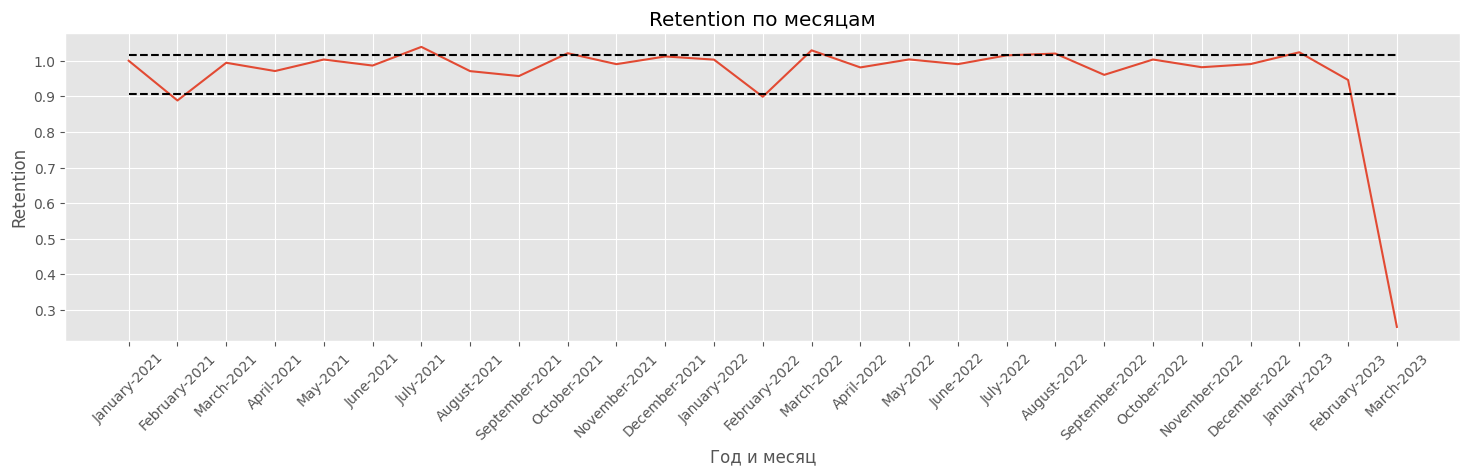

In [47]:
# Визуализация
x = df_retention["name"]
y = df_retention["retention"]

plt.figure(figsize=(18, 4))

plt.plot(x, y)
plt.hlines(
    y=lower_bound,
    xmin=min(df_retention.index),
    xmax=max(df_retention.index),
    linestyles="dashed",
    colors="black",
)
plt.hlines(
    y=upper_bound,
    xmin=min(df_retention.index),
    xmax=max(df_retention.index),
    linestyles="dashed",
    colors="black",
)
plt.xticks(rotation=45)
plt.xlabel("Год и месяц")
plt.ylabel("Retention")
plt.title("Retention по месяцам")

plt.show()

## 15. Посчитайте средний доход с пользователя (ARPU) в каждом месяце и доверительные интервалы для него (5 баллов)
ARPU = Average Revenue Per User  
1) Постройте график ARPU для каждого месяца      
2) Добавьте на график область доверительного интервала для каждого месяца

In [48]:
# Расчет среднего чека по годам и месяцам
df_arpu = df.groupby(["year", "day_month", "month"])["sale"].agg("mean").reset_index()

df_arpu["name"] = df_arpu["month"].astype(str) + "-" + df_arpu["year"].astype(str)

df_arpu.head()

,year,day_month,month,sale,name
0,2021,1,January,2514.110722,January-2021
1,2021,2,February,2574.791670,February-2021
2,2021,3,March,2479.769048,March-2021
3,2021,4,April,2521.359168,April-2021
4,2021,5,May,2539.437882,May-2021


In [49]:
data = df_arpu["sale"]

# Вычисление среднего значения и стандартного отклонения
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)
n = len(data)
alpha = 0.05

# Вычисление доверительного интервала
z_score = norm.ppf(1 - alpha / 2)
margin_of_error = z_score * sample_std / np.sqrt(n)

lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print(
    f"95%-ый доверительный интервал: [{lower_bound:.2f}, {upper_bound:.2f}], ширина {upper_bound - lower_bound:.2f}"
)

95%-ый доверительный интервал: [2502.43, 2558.36], ширина 55.93


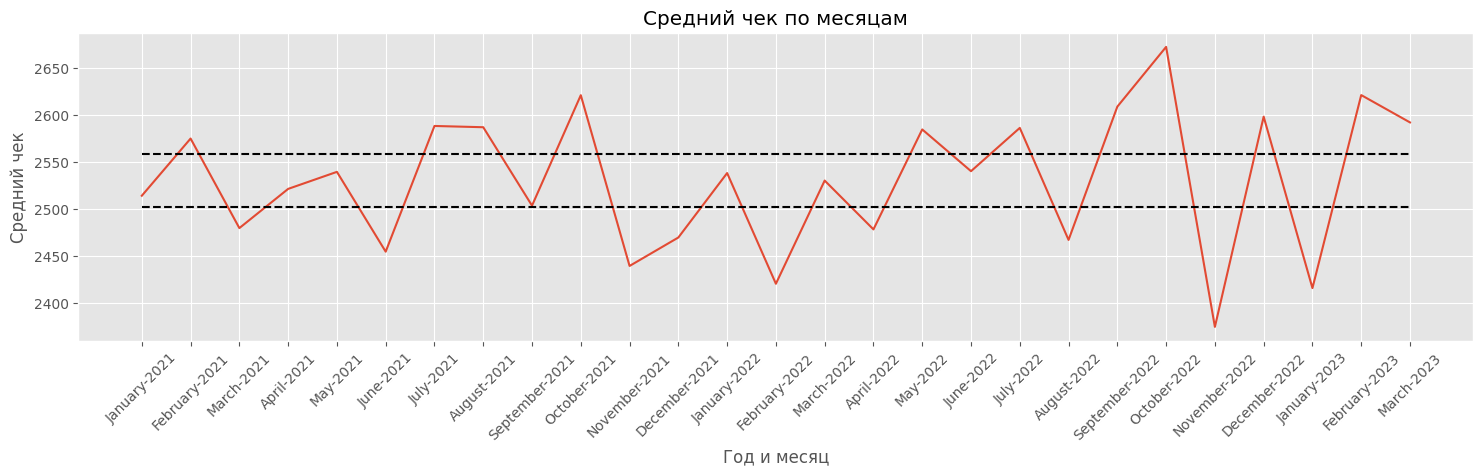

In [52]:
# Визуализация
x = df_arpu["name"]
y = df_arpu["sale"]

plt.figure(figsize=(18, 4))

plt.plot(x, y)
plt.hlines(
    y=lower_bound,
    xmin=min(df_arpu.index),
    xmax=max(df_arpu.index),
    linestyles="dashed",
    colors="black",
)
plt.hlines(
    y=upper_bound,
    xmin=min(df_arpu.index),
    xmax=max(df_arpu.index),
    linestyles="dashed",
    colors="black",
)
plt.xticks(rotation=45)
plt.xlabel("Год и месяц")
plt.ylabel("Средний чек")
plt.title("Средний чек по месяцам")

plt.show()